c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\yolos\feature_extraction_yolos.py:28: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Detected person with confidence 0.974 at location [159.83, 142.45, 302.54, 402.54]
Detected car with confidence 0.976 at location [80.86, 223.04, 115.86, 301.94]
Detected car with confidence 0.947 at location [743.41, 195.6, 871.75, 349.3]
Detected car with confidence 0.997 at location [289.36, 211.98, 464.45, 352.23]
Detected bicycle with confidence 0.986 at location [203.63, 313.66, 268.18, 440.32]
Detected car with confidence 0.994 at location [463.81, 217.73, 597.28, 339.15]
Detected truck with confidence 0.905 at location [109.05, 87.3, 262.14, 317.71]
Detected car with confidence 0.999 at location [558.15, 207.6, 810.86, 359.95]
Detected potted plant with confidence 0.902 at location [161.08, 229.44, 268.3, 320.92]
Detected car with confidence 0.936 at location [423.12, 221.97, 474.22, 257.52]
Detected car with confidence 0.935 at location [-0.04, 155.05, 93.79, 354.92]


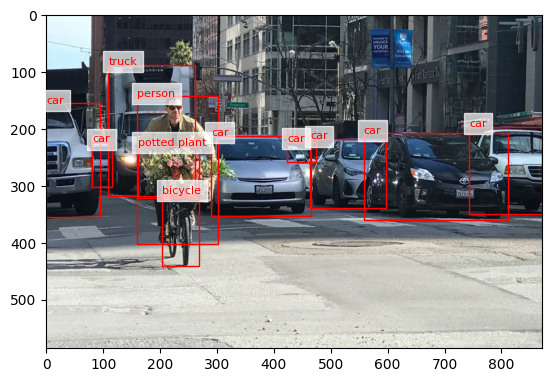

In [1]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

url = "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EYFejGUjvjPcc4PZTwoufw.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-small')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

# print results
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

labels = results["labels"]
boxes = results["boxes"]

image_np = image.convert("RGB")
# image_np = torch.Tensor(np.array(image_np))

fig, ax = plt.subplots()

for label, box in zip(labels, boxes):
    label_name = model.config.id2label[label.item()]
    box = box.tolist()

    # Draw the bounding box rectangle
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add label text near the bounding box
    ax.text(box[0], box[1], label_name, color='r', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

ax.imshow(image_np)
